Import the libraries that we use later

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflowjs as tfjs
# from tensorflow.keras import models, layers
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import itertools

Define the path of a dataset


In [4]:
path = 'C:/Users/Raniah/Downloads/Bangkit/Capstone/model/'
TRAIN = os.path.join(path, 'training')
VALIDATION = os.path.join(path, 'validation')
TESTING = os.path.join(path, 'testing')

Applying specific augmentations or preprocessing and providing batch data ready for training, validation, and testing 

In [5]:
train_datagen = ImageDataGenerator(
        rescale = 1./255.
    )

train_generator = train_datagen.flow_from_directory(
        TRAIN,
        batch_size = 25,
        class_mode = 'binary',
        target_size = (256, 256),
        color_mode = 'rgb',
        shuffle = True,
        classes = ['bacterial', 'healthy']
    )

Found 7175 images belonging to 2 classes.


In [6]:
validation_datagen = ImageDataGenerator(
        rescale = 1./255.
    )

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION,
        batch_size = 25,
        class_mode = 'binary',
        target_size = (256, 256),
        color_mode = 'rgb',
        shuffle = 1000,
        classes = ['bacterial', 'healthy']
    )

Found 2558 images belonging to 2 classes.


In [7]:
# Initialize the ImageDataGenerator object for preprocessing
testing_datagen = ImageDataGenerator(
    rescale=1./255.
)

# Use testing_datagen to create the testing generator
testing_generator = testing_datagen.flow_from_directory(
    TESTING,
    batch_size=25,
    class_mode='binary',
    target_size=(256, 256),
    color_mode='rgb',
    shuffle=True,
    classes=['bacterial', 'healthy']
)

Found 74 images belonging to 2 classes.


Define the architecture of the model by configuring the layers. In the case of a Convolutional Neural Network (CNN), this typically involves stacking convolutional layers, pooling layers, and fully connected layers to create a hierarchical feature extractor. Feed the preprocessed dataset into the model and train it using an optimization, loss, and mectrics.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

Training process of the model.

In [9]:
#train the network with the given inputs and the corresponding Labels
history = model.fit(
    train_generator, validation_data = validation_generator,
    epochs=10,
    batch_size=25,
    verbose=1,
)

Epoch 1/10
287/287 [==============================] - 817s 3s/step - loss: 0.2730 - accuracy: 0.8829 - val_loss: 0.0862 - val_accuracy: 0.9754
Epoch 2/10
287/287 [==============================] - 728s 3s/step - loss: 0.1009 - accuracy: 0.9671 - val_loss: 0.1471 - val_accuracy: 0.9363
Epoch 3/10
287/287 [==============================] - 796s 3s/step - loss: 0.0597 - accuracy: 0.9791 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 4/10
287/287 [==============================] - 788s 3s/step - loss: 0.0324 - accuracy: 0.9870 - val_loss: 0.0272 - val_accuracy: 0.9906
Epoch 5/10
287/287 [==============================] - 897s 3s/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0293 - val_accuracy: 0.9926
Epoch 6/10
287/287 [==============================] - 859s 3s/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0080 - val_accuracy: 0.9984
Epoch 7/10
287/287 [==============================] - 954s 3s/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0049 - val_accuracy: 0.9984

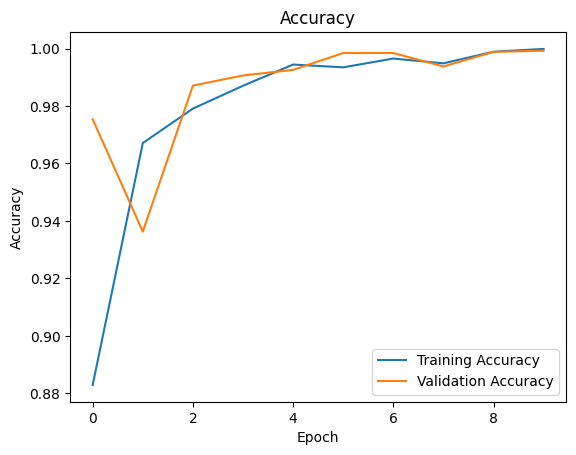

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate the model

In [11]:
test_loss, test_acc = model.evaluate(testing_generator)
print('Test Loss :', test_loss)
print('Test Accuracy : {:.2f}%'.format(test_acc * 100))

3/3 [==============================] - 3s 777ms/step - loss: 3.5568e-06 - accuracy: 1.0000
Test Loss : 3.556779120117426e-06
Test Accuracy : 100.00%


In [12]:
history
print(history.params)
print(history.history.keys())
len(history.history['accuracy'])

{'verbose': 1, 'epochs': 10, 'steps': 287}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


10

In [13]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

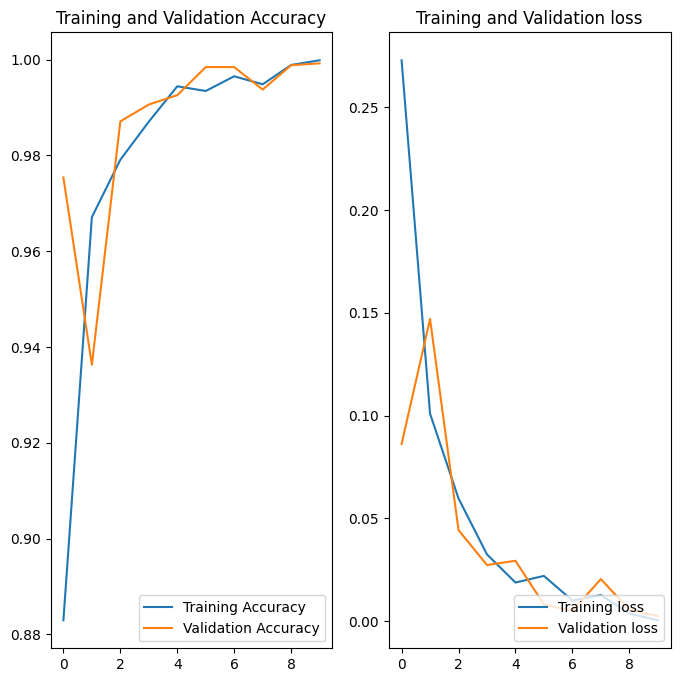

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc,label='Training Accuracy')
plt.plot(range(10), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss,label='Training loss')
plt.plot(range(10), val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

Use the trained model to make predictions on new, unseen data, referred to as the testing set. This allows you to assess the model's performance on real-world examples and measure its generalization capabilities.

3/3 [==============================] - 3s 717ms/step


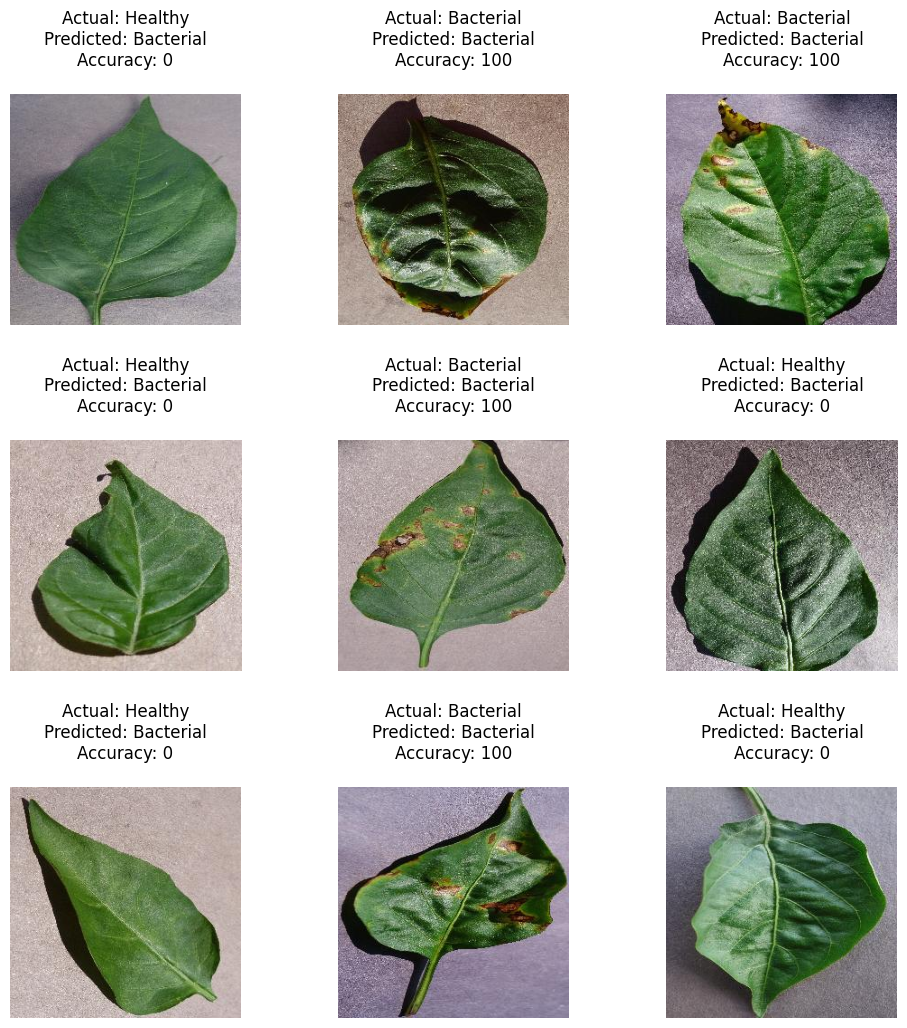

In [76]:
# Predict using the model on the testing generator
predictions = model.predict(testing_generator)

# Take some sample images from the testing generator
num_images = 9
images, labels = testing_generator.next()
predicted_labels = np.argmax(predictions[:num_images], axis=1)
labels = labels.astype(int)

# Configure the plot
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

# define the class labesl
class_labels = ['Bacterial', 'Healthy']

# Iterate through the images and their labels
for i in range(num_images):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i])

    # Get the actual label by converting the one-hot encoded labels to their original form
    actual_label = class_labels[labels[i]]
    
    # Get the predicted label by mapping the predicted label index to the respective class
    predicted_label = class_labels[predicted_labels[i]]
    
    # Calculate the accuracy for the current image
    accuracy = 100 if predicted_labels[i] == labels[i] else 0
    
    # Determine the title based on accuracy
    if accuracy == 0:
        title = 'Healthy Leaf'
    else:
        title = '{} Leaf'.format(actual_label)

    # Add accuracy to the image title
    plt.title('Actual: {}\nPredicted: {}\nAccuracy: {}\n'.format(actual_label, predicted_label, accuracy, title))
    plt.axis('off')
    
plt.show()

Test the model from gallery

1/1 [==============================] - 1s 1s/step
[[0.9835101]]
Prediction is Healthy.
Healthy


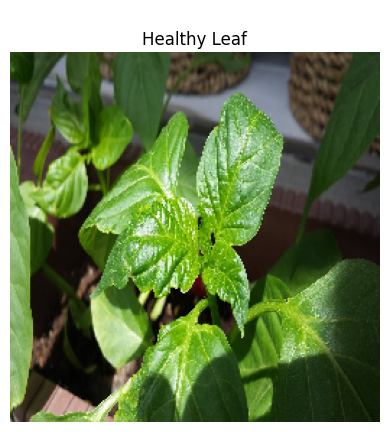

In [75]:
image = load_img(r"C:/Users/Raniah/Downloads/Bangkit/Capstone/dataset/BellPepperHealthy/testing/BellPepperHealthy(121).jpg", target_size=(256, 256))
# image = load_img(r"C:/Users/Raniah/Downloads/Bangkit/Capstone/dataset/BellPepperBacterial/validation/BacterialSpot(3435).jpg", target_size=(256, 256))
# image = load_img(r"C:/Users/Raniah/Downloads/Bangkit/Capstone/dataset/BellPepperBacterial/testing/BacterialSpot(3428).jpg", target_size=(256, 256))
# image = load_img(r"C:/Users/Raniah/Downloads/Bangkit/Capstone/dataset/BellPepperHealthy/testing/BellPepperHealthy(199).JPG", target_size=(256, 256))
# image = load_img(r"C:/Users/Raniah/Pictures/bangkit background.PNG", target_size=(256, 256))
image_array = img_to_array(image)
prediction_image = np.array(image_array) / 255.0
prediction_image = np.expand_dims(prediction_image, axis=0)

pred = model.predict(prediction_image)
print(pred)
value = round(pred[0][0])

# print(pred)

class_labels = ['Bacterial', 'Healthy']

# Get the predicted label based on the predicted label index
predicted_label = class_labels[value]
print('Prediction is {}.'.format(predicted_label))

# Normalize the image array to [0, 1]
image_array /= 255.0

# Determine the title based on the predicted label

print(predicted_label)

if predicted_label == 'Healthy':
    title = 'Healthy Leaf'
else:
    title = 'Bacterial Leaf'

# Display the image
plt.imshow(image_array)
plt.axis('off')
plt.title('\n{}'.format(title))
plt.show()

After training and evaluation, save the trained model in a suitable format for future use. Common formats include the .h5 format for TensorFlow and the tfjs format for TensorFlow.js. Saving the model allows you to load and deploy it in other environments for inference or further refinement.

h5

In [69]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('bellpepper.h5') 

TFJS

In [60]:
saved_model_path = "C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba4/tfjs/"
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba4/tfjs/assets


INFO:tensorflow:Assets written to: C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba4/tfjs/assets


In [61]:
tfjs.converters.save_keras_model(model, 'C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba4/tfjs/')

TFLITE 
Resource-constrained devices such as mobile phones

In [71]:
#@title Optimization settings
optimize_lite_model = False  #@param {type:"boolean"}
#@markdown Setting a value greater than zero enables quantization of neural network activations. A few dozen is already a useful amount.
num_calibration_examples = 1000 #@param {type:"slider", min:0, max:1000, step:1}
representative_dataset = None
if optimize_lite_model and num_calibration_examples:
  # Use a bounded number of training examples without labels for calibration.
  # TFLiteConverter expects a list of input tensors, each with batch size 1.
  representative_dataset = lambda: itertools.islice(
      ([image[None, ...]] for batch, _ in validation_generator for image in batch),
      num_calibration_examples)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
if optimize_lite_model:
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  if representative_dataset:  # This is optional, see above.
    converter.representative_dataset = representative_dataset
lite_model_content = converter.convert()

with open("C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba4/bellpepper.tflite", "wb") as f:
  f.write(lite_model_content)
print("Wrote %sTFLite model of %d bytes." %
      ("optimized " if optimize_lite_model else "", len(lite_model_content)))

Wrote TFLite model of 14975484 bytes.


In [73]:
interpreter = tf.lite.Interpreter(model_content=lite_model_content)
# This little helper wraps the TFLite Interpreter as a numpy-to-numpy function.
def lite_model(images):
  interpreter.allocate_tensors()
  interpreter.set_tensor(interpreter.get_input_details()[0]['index'], images)
  interpreter.invoke()
  return interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

In [74]:
#@markdown For rapid experimentation, start with a moderate number of examples.
num_eval_examples = 700  #@param {type:"slider", min:0, max:700}
eval_dataset = ((image, label)  # TFLite expects batch size 1.
                for batch in validation_generator
                for (image, label) in zip(*batch))
count = 0
count_lite_tf_agree = 0
count_lite_correct = 0
for image, label in eval_dataset:
  probs_lite = lite_model(image[None, ...])[0]
  probs_tf = model(image[None, ...]).numpy()[0]
  y_lite = np.argmax(probs_lite)
  y_tf = np.argmax(probs_tf)
  y_true = np.argmax(label)
  count +=1
  if y_lite == y_tf: count_lite_tf_agree += 1
  if y_lite == y_true: count_lite_correct += 1
  if count >= num_eval_examples: break
print("TFLite model agrees with original model on %d of %d examples (%g%%)." %
      (count_lite_tf_agree, count, 100.0 * count_lite_tf_agree / count))
print("TFLite model is accurate on %d of %d examples (%g%%)." %
      (count_lite_correct, count, 100.0 * count_lite_correct / count))

TFLite model agrees with original model on 700 of 700 examples (100%).
TFLite model is accurate on 700 of 700 examples (100%).
